In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

# Import taiwan real estate data
taiwan_real_estate = pd.read_csv("./../../data/regression/taiwan_real_estate2.csv")
sp500_yearly_returns = pd.read_csv("./../../data/regression/sp500_yearly_returns.csv")
ad_conversion = pd.read_csv("./../../data/regression/ad_conversion.csv")

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25

mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

mdl_price_vs_dist = ols("price_twd_msq ~ dist_to_mrt_m", data=taiwan_real_estate).fit()

In [2]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        04:10:29   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [3]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [4]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


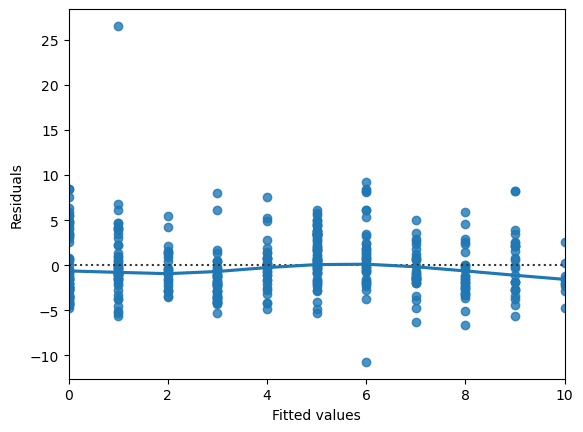

In [5]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

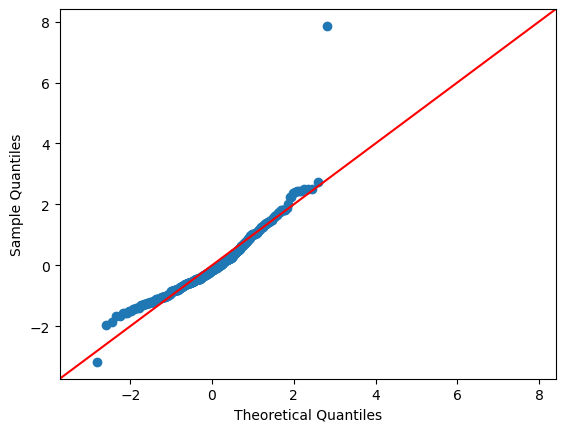

In [6]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

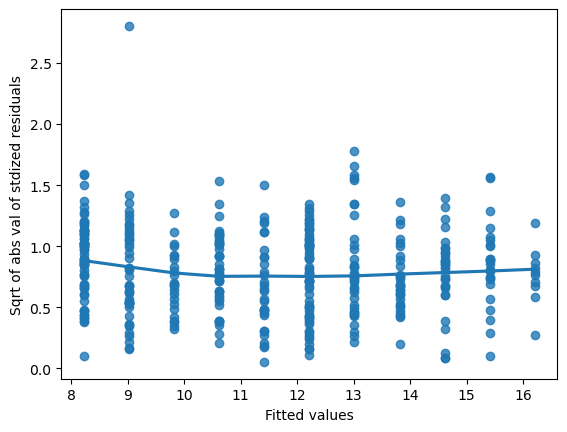

In [7]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

In [8]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

In [9]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by="leverage", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage
347       6488.021              1        15 to 30       3.388805  0.046808
116       6396.283              1        30 to 45       3.691377  0.045313
249       6306.153              1        15 to 30       4.538578  0.043870
255       5512.038              1        30 to 45       5.264750  0.032221
8         5512.038              1        30 to 45       5.688351  0.032221


In [10]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(by="cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage  \
270       252.5822              1         0 to 15      35.552194  0.003466   
249      6306.1530              1        15 to 30       4.538578  0.043870   
148      3780.5900              0        15 to 30      13.645991  0.013470   
116      6396.2830              1        30 to 45       3.691377  0.045313   
347      6488.0210              1        15 to 30       3.388805  0.046808   

     cooks_dist  
270    0.092948  
249    0.052859  
148    0.048675  
116    0.040168  
347    0.039480  
